Assignment Code: DA-AG-010

# Regression & Its Evaluation | Assignment

Q1. What is Simple Linear Regression?

Ans.  A simple linear equation is an equation that shows a relationship between two variables, typically written in the form:
y=mx+by = mx + b
Where:
yy is the dependent variable (output)


xx is the independent variable (input)


mm is the slope of the line (how much yy changes for each unit change in xx)


bb is the y-intercept (the value of yy when x=0x = 0)
Example:
y=2x+3y = 2x + 3
This means:
The slope m=2m = 2, so for every 1 unit increase in xx, yy increases by 2.


The y-intercept b=3b = 3, so the line crosses the y-axis at 3.

Q2. What are the key assumptions of Simple Linear Regression?

Ans. Here are the key assumptions of Simple Linear Regression in short:

1. Linearity – Relationship between xx and yy is linear.


2. Independence – Errors are independent.


3. Homoscedasticity – Constant variance of errors.


4. Normality – Errors are normally distributed.


5. (No multicollinearity) – Not applicable in simple linear regression (only one predictor)

Q3. What is heteroscedasticity, and why is it important to address in regression models?

Ans. Heteroscedasticity refers to a situation in a regression model where the variance of the errors (residuals) is not constant across all levels of the independent variable. In simple terms, this means the spread of the errors changes as the value of x changes.

  * If the residuals fan out (get wider) or funnel in (get narrower) as x increases, that’s a sign of heteroscedasticity.

  * In contrast, homoscedasticity means the residuals have equal spread (or variance) across all values of x, which is a key assumption of linear regression.

Heteroscedasticity is important because it can lead to inaccurate or misleading results in a regression analysis:

1. Biased Standard Errors

   * When the variance of errors isn't constant, the standard errors of the estimated coefficients become unreliable.
   * This affects the confidence intervals and hypothesis tests, potentially leading to wrong conclusions (e.g., thinking a variable is significant when it’s not).
2. Inefficient Estimates

  * Ordinary Least Squares (OLS) still gives unbiased coefficient estimates, but they are no longer the best linear unbiased estimators (BLUE).
  * This means the estimates may not be as precise as they could be.
3. Misleading Model Fit

  * Heteroscedasticity can distort diagnostic plots, making the model appear better or worse than it actually is.

Q4. What is Multiple Linear Regression?

Ans. Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent variables.

It helps us understand how several factors together influence an outcome.
Purpose:

  * To estimate the effect of each independent variable on the dependent variable while controlling for others.


  * To make predictions based on multiple inputs.


Q5.  What is polynomial regression, and how does it differ from linear regression?

Ans. Polynomial regression is a type of regression analysis used to model the relationship between an independent variable and a dependent variable when that relationship is non-linear. It extends linear regression by including higher-degree terms of the independent variable, allowing the model to fit a curve rather than a straight line.

In simple linear regression, the relationship is expressed with a straight-line equation: y = β₀ + β₁x + ε

Polynomial regression, on the other hand, includes additional powers of the independent variable, such as:
y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ + ε

This makes polynomial regression more flexible and better suited for capturing complex, non-linear patterns in the data. While linear regression is ideal when the relationship between variables is roughly constant, polynomial regression is used when the data shows curves or changes in direction.

In summary, polynomial regression differs from linear regression by allowing for curved relationships, making it a more powerful tool for modeling non-linear trends. However, it should be used carefully to avoid overfitting, especially when using high-degree polynomials.

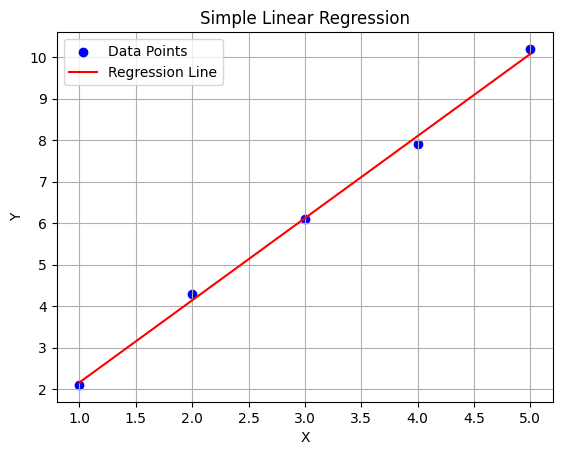

In [ ]:
'''Q6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
●	X = [1, 2, 3, 4, 5]
●	Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
(Include your Python code and output in the code box below.)'''

import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Calculate coefficients
n = len(X)
m = (n * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (n * np.sum(X**2) - np.sum(X)**2)
b = (np.sum(Y) - m * np.sum(X)) / n

# Predict values
Y_pred = m * X + b

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''Q7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results. (Include your Python code and output in the code box below.)'''

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
df = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Features and target
X = df[['Area', 'Rooms']]
y = df['Price']
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()
print("Regression Coefficients:")
print(model.params)

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF:")
print(vif)

Regression Coefficients:
const    103157.894737
Area         63.157895
Rooms     34736.842105
dtype: float64

VIF:
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


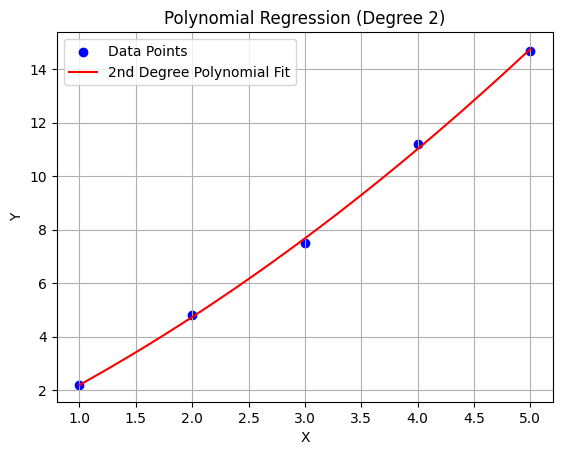

Model Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [ ]:
'''Q8. Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.)'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_range, Y_pred, color='red', label='2nd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

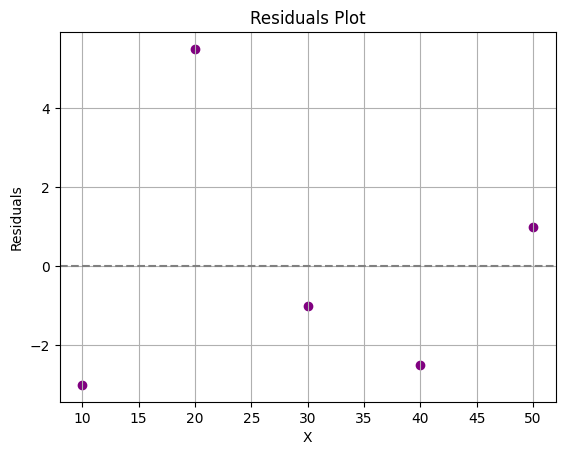

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [ ]:
'''Q9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.)'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit linear regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Optional: print residuals
print("Residuals:", residuals)

Q10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

* **Goal:** Predict house prices using features like **area**, **number of rooms**, and **location**.
* **Challenges:**
   **Heteroscedasticity:** The spread of residuals is not constant — larger houses may have wider price variability.
   **Multicollinearity:** Predictors like **area** and **number of rooms** are likely correlated.

## **1️. How to Address Heteroscedasticity**

 **Why it’s a problem:**

* Heteroscedasticity doesn’t bias coefficients, but it makes standard errors unreliable → bad p-values → misleading significance tests.

 **Common solutions:**

1️. **Transform the dependent variable (Y):**

* Take the log of house prices. This often stabilizes variance.
* New model:

  $$
  \log(\text{Price}) = \beta_0 + \beta_1(\text{Area}) + \beta_2(\text{Rooms}) + \beta_3(\text{Location}) + \epsilon
  $$

2️. **Use robust standard errors:**

* Instead of changing the model, adjust the calculation of standard errors to be robust to heteroscedasticity.
* E.g., in Python: `statsmodels` → `HC0`, `HC3` robust covariance estimators.

3️. **Weighted Least Squares (WLS):**

* Give less weight to observations with higher variance.
* More complex, but effective for severe heteroscedasticity.

4️. **Check for omitted variables:**

* Sometimes heteroscedasticity appears because important predictors are missing (e.g., neighborhood income level).

## **2️. How to Address Multicollinearity**

 **Why it’s a problem:**

* High correlation among predictors inflates standard errors → unstable estimates → hard to interpret individual effects.

 **Common solutions:**

1️. **Check VIF:**

* Drop or combine predictors with high VIF (typically > 10 is a red flag).
* Example: If **area** and **rooms** are highly correlated, maybe replace them with a composite feature like **area per room**.

2️. **Use dimensionality reduction:**

* **Principal Component Analysis (PCA)**: Combines correlated variables into uncorrelated components.
* This sacrifices interpretability but can stabilize the model.

3️. **Regularization:**

* Use **Ridge Regression (L2 penalty)** to shrink coefficients of correlated predictors.
* Or **Lasso Regression (L1 penalty)** to shrink some coefficients to zero → automatic feature selection.
* Example: `sklearn.linear_model.Ridge` or `Lasso`.

4️. **Domain knowledge:**

* Maybe you realize **area** is more meaningful than **rooms**, so you drop **rooms** altogether.

## **3️. Model Diagnostics and Validation**

 **After fixing issues:**

* Re-check residual plots to confirm variance is more stable.
* Re-calculate VIF to verify multicollinearity is under control.
* Use cross-validation to check generalization.
* Compare model performance (R², RMSE) with and without fixes.

## **4️. Final Deliverable**

Provide a **clear, interpretable model**:

* Communicate the impact of each predictor.
* Explain any transformations used (e.g., log price).
* Justify any features dropped or combined.

---